In [41]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [9]:
def clean_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[["L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)', 'Age at CT']]
    n = ct_data.shape[0]
    preprocessed_ct_data = []
    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break
        if not ignore:
          preprocessed_ct_data.append(row)
    return np.array(preprocessed_ct_data, dtype=np.float32)


In [ ]:
oppScrData = pd.read_excel (r'sample_data/OppScrData.xlsx')  
ct_data = clean_ct_data(oppScrData)

In [85]:
y = ct_data[:,-1]
X = (ct_data[:,:-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

In [86]:
X

array([[ 192.      ,  485.50287 ,  694.3143  , ...,   48.41319 ,
        2709.064   ,   52.      ],
       [ 256.      ,  490.05453 ,  706.0515  , ...,   50.101334,
           0.      ,   54.      ],
       [ 149.      ,  289.1081  ,  584.4892  , ...,   69.11585 ,
        2586.575   ,   57.      ],
       ...,
       [ 135.      ,  822.2872  , 1154.6051  , ...,   57.78635 ,
        1115.997   ,   45.      ],
       [ 219.      ,  418.2     ,  660.3461  , ...,   50.929787,
        3515.371   ,   44.      ],
       [ 151.      ,   61.54359 ,  362.88974 , ...,   29.688124,
        3015.129   ,   54.      ]], dtype=float32)

In [87]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [88]:
predicted_y = clf.predict(X_test)

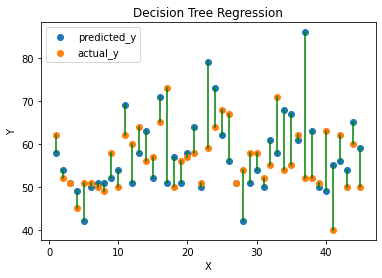

In [91]:
plt.figure()
x = [i+1 for i in range(len(y_test))]
plt.plot((x,x),([i for i in predicted_y], [j for j in y_test]),c='green')
plt.scatter(x, predicted_y, label="predicted_y")
plt.scatter(x, y_test, label="actual_y")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [82]:
y_test

array([62., 52., 51., 45., 51., 51., 50., 49., 58., 50., 62., 60., 64.,
       56., 57., 65., 73., 50., 56., 57., 58., 51., 59., 64., 68., 67.,
       51., 54., 58., 58., 52., 55., 71., 54., 55., 62., 52., 52., 51.,
       63., 40., 62., 50., 60., 50.], dtype=float32)

In [58]:
predicted_y

array([56., 54., 51., 49., 42., 50., 51., 51., 51., 55., 69., 54., 58.,
       63., 58., 71., 55., 55., 50., 58., 65., 52., 79., 78., 62., 56.,
       54., 42., 50., 53., 50., 64., 58., 68., 67., 50., 86., 60., 50.,
       49., 55., 52., 54., 69., 59.])

In [37]:
sum(abs(y_test - clf.predict(X_test)))

2597.0

In [40]:
regressor = tree.DecisionTreeRegressor()
cross_val_score(regressor, X, y, cv=10)

array([-0.00141493, -0.1856235 , -0.23901702, -0.40512294, -0.05780021,
       -0.07633893, -0.2079092 , -0.09245704,  0.04382965,  0.09265226])